In [58]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [59]:
ticker = 'TAEE11.SA'
start = dt.datetime(2018,1,1)
end = dt.datetime.now()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

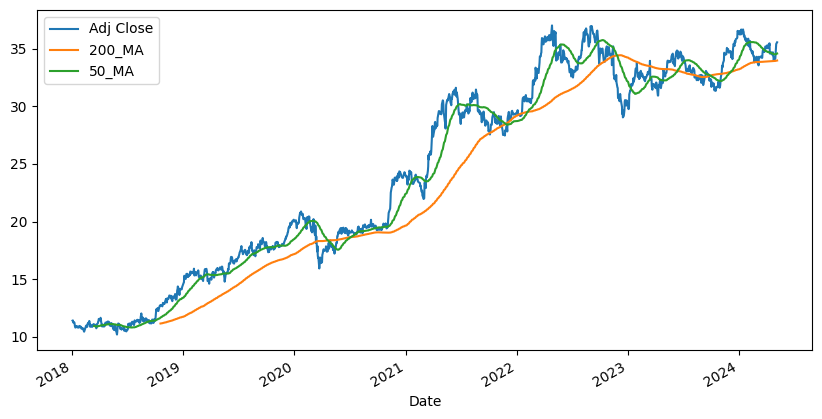

In [60]:
# load taesa11 data
taesa11 = yf.download(ticker, start, end)

# calculate 50-day moving average
taesa11['50_MA'] = taesa11['Adj Close'].rolling(window=50).mean()

# calculate 50-day moving average
taesa11['200_MA'] = taesa11['Adj Close'].rolling(200).mean()

# plot the closing price and moving average
taesa11[['Adj Close','200_MA', '50_MA']].plot(figsize=(10, 5))

<Axes: xlabel='Date'>

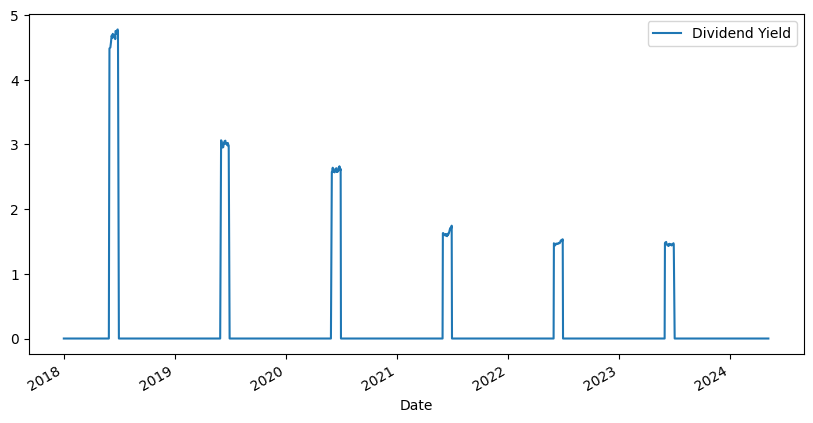

In [61]:
# Placeholder for dividend data - in reality, you would replace this with actual data
taesa11['Dividends'] = np.where(taesa11.index.month == 6, 0.5, 0)  # Example: 0.5 dividend in June

# Calculate Dividend Yield
taesa11['Dividend Yield'] = taesa11['Dividends'] / taesa11['Adj Close'] * 100

taesa11[['Dividend Yield']].plot(figsize=(10, 5))



In [62]:
taesa11 = taesa11.dropna()

In [63]:
# Calculate RSI indicator

delta = taesa11['Adj Close'].diff(1)
delta.dropna(inplace = True)

positive = delta.copy()
negative = delta.copy()

positive[positive < 0] = 0
negative[negative > 0] = 0

days = 30

average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean())

relative_strengh = average_gain / average_loss

rsi = 100.0 - (100.0 / (1.0 + relative_strengh))

combined = pd.DataFrame()
combined['Adj Close'] = taesa11['Adj Close']
combined['RSI'] = rsi

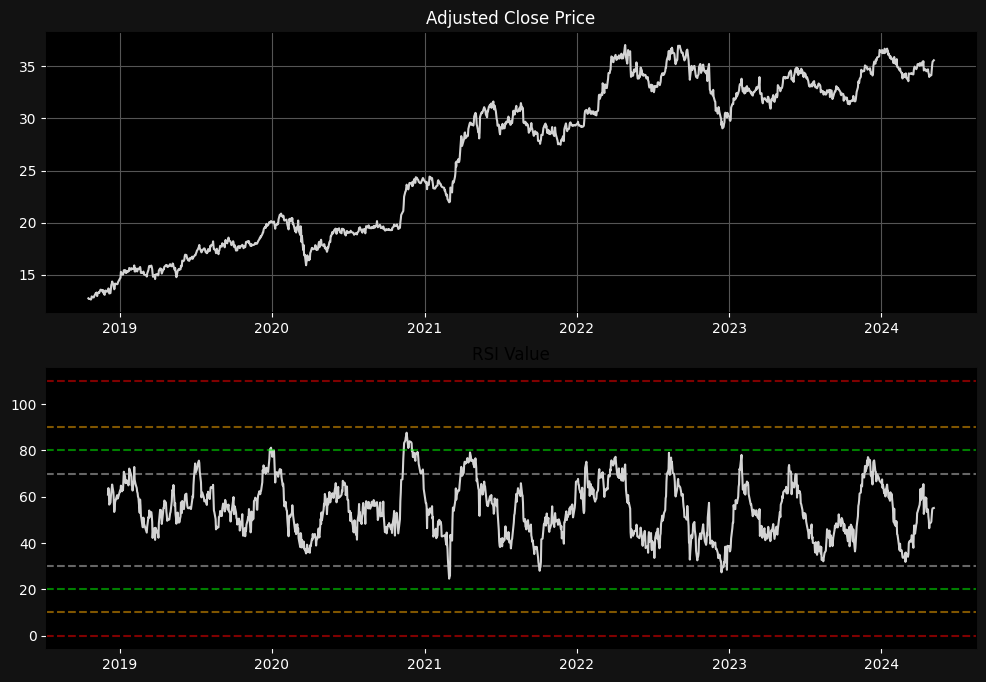

In [64]:
# plot visualization

plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['Adj Close'], color='lightgray')
ax1.set_title('Adjusted Close Price', color='white')

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color='lightgray')
ax2.axhline(0, linestyle='--', alpha= 0.5, color='#ff0000')
ax2.axhline(10, linestyle='--', alpha= 0.5, color='#ffaa00')
ax2.axhline(20, linestyle='--', alpha= 0.5, color='#00ff00')
ax2.axhline(30, linestyle='--', alpha= 0.5, color='#cccccc')
ax2.axhline(70, linestyle='--', alpha= 0.5, color='#cccccc')
ax2.axhline(80, linestyle='--', alpha= 0.5, color='#00ff00')
ax2.axhline(90, linestyle='--', alpha= 0.5, color='#ffaa00')
ax2.axhline(110, linestyle='--', alpha= 0.5, color='#ff0000')

ax2.set_title('RSI Value')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')